In [1]:
# Input window length, we should be able to genearate a graph assuming k=2
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
import functools

In [2]:
def generate_node(n,k):
    """This function inputs an alphabet with size k and window size n, and output all nodes in the de Bruijn graph"""
    length = n-1
    lst = list(itertools.product(range(k), repeat=length))
    return lst

In [3]:
def turn_tuple_to_str(tuple):
    string = ''
    for element in tuple:
        string += str(element)
    return string

In [4]:
def generate_graph(n,k):
    """take in window size n and assume alphabet with {0,1,...k} output a de Bruijn graph"""
    node_lst = generate_node(n,k)
    G = nx.DiGraph(directed=True)
    edge_labels={}
    for node1, node2 in itertools.combinations(node_lst, 2):
        node1_copy = node1[1:]
        node2_copy = node2[:n-2]
        label1 = node2[n-2]
        node1_copy2 = node1[:n-2]
        node2_copy2 = node2[1:]
        label2 = node1[n-2]
        if node1_copy == node2_copy:
            G.add_edge(turn_tuple_to_str(node1), turn_tuple_to_str(node2))
            edge_labels[(turn_tuple_to_str(node1), turn_tuple_to_str(node2))]=label1
        if node1_copy2 == node2_copy2:
            G.add_edge(turn_tuple_to_str(node2), turn_tuple_to_str(node1))
            edge_labels[(turn_tuple_to_str(node2), turn_tuple_to_str(node1))]=label2
    G.add_edge(1,1)
    G.add_edge(0,0)
    return G;

In [7]:
generate_graph(3,3)

In [5]:
#n = window length
#k = alphabet size
nx.has_eulerian_path(generate_graph(2,5));

{(1, 1): Text(1.0, 4.371138828673793e-08, '{}'),
 (0, 0): Text(-1.0, -4.371138828673793e-08, '{}')}

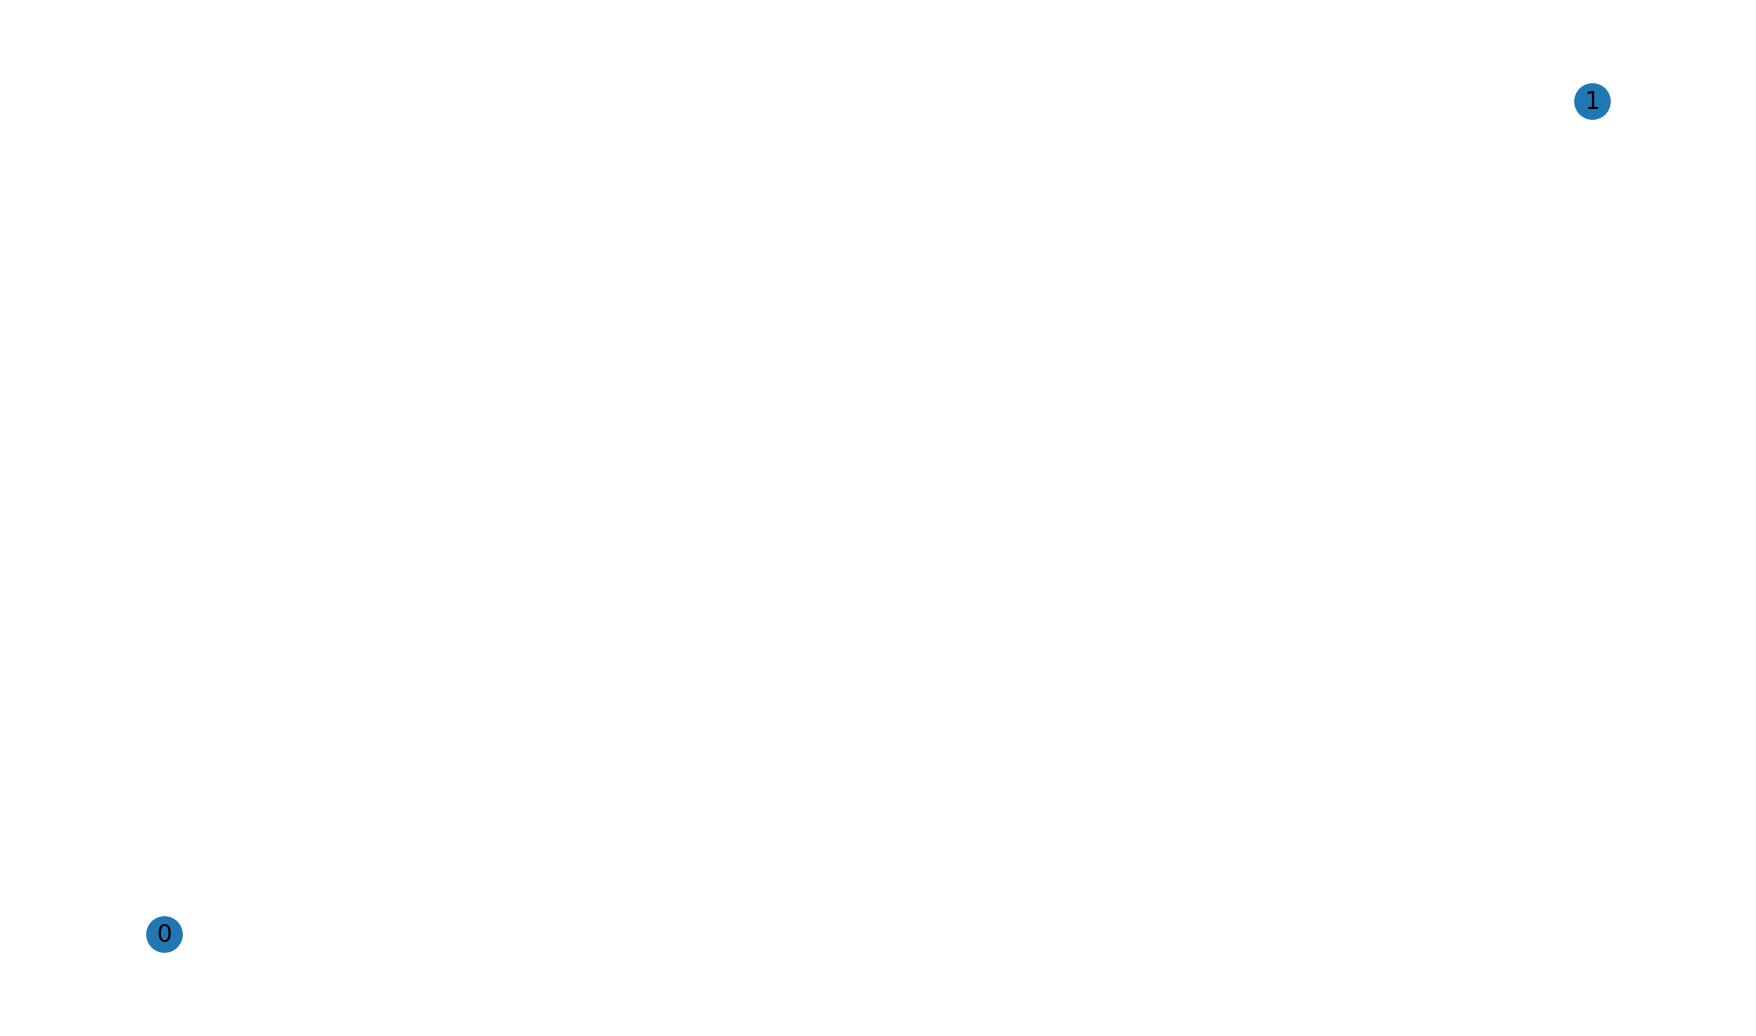

In [6]:
G=nx.MultiDiGraph(directed=True)
pos = nx.shell_layout(G)
G.add_edge(1,1)
G.add_edge(0,0)
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.3')
nx.draw_networkx_edge_labels(G, pos, font_color='red')